<a href="https://colab.research.google.com/github/FariaParvinMegha/thesis/blob/main/CNN%2BBiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install git+https://github.com/forrestbao/pyeeg.git


  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-vs7nfw89
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-vs7nfw89
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28111 sha256=487f73c172f4fb5df731a0779fd72aa8166cd2a52484c95123e11991586f3a41
  Stored in directory: /tmp/pip-ephem-wheel-cache-bceuc1c3/wheels/a8/c4/1a/cee09dcc12a11620066d35ace42e3c1e3bfbcc1db3a0ce7788
Successfully built pyeeg


In [ ]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math
from sklearn.preprocessing import normalize

import os
import time

In [ ]:
channel = [1,2,4,5,8,10,15,21,22,25,26,27,28,31,32]
band = [4,8,13,22,30,45] #5 bands
window_size = 256 #Averaging band power of 2 sec
step_size = 16 #Each 0.125 sec update once
sample_rate = 128 #Sampling rate of 128 Hz
subjectList = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']


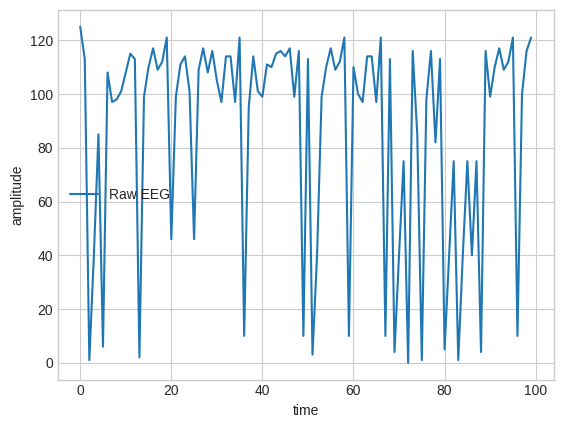

In [ ]:
 dat_file_path = "/content/drive/MyDrive/data_preprocessed_python" + 's01.dat'

s01_np = np.fromfile("/content/drive/MyDrive/data_preprocessed_python/s01.dat", dtype='byte')

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7.5,2.5)
plt.rcParams.update({'font.size': 15})

plt.style.use('bmh')

plt.style.use('default')

plt.style.use('seaborn-whitegrid')

t = np.arange(0, 100, 1)

EEG_s01 = s01_np[:100]

plt.figure()
plt.plot(t, EEG_s01, label="Raw EEG")

plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend(loc="center left")

In [ ]:
def FFT_Processing (sub, channel, band, window_size, step_size, sample_rate):
   meta = []
   with open('/content/drive/MyDrive/data_preprocessed_python/s' + sub + '.dat', 'rb') as file:

        subject = pickle.load(file, encoding='latin1') #resolve the python 2 data problem by encoding : latin1

        for i in range (0,40):
            # loop over 0-39 trails
            data = subject["data"][i]
            labels = subject["labels"][i]
            start = 0;
            #data.shape

            while start + window_size < data.shape[1]:
                meta_array = []
                meta_data = [] #meta vector for analysis
                for j in channel:
                    X = data[j][start : start + window_size] #Slice raw data over 2 sec, at interval of 0.125 sec
                    Y = pe.bin_power(X, band, sample_rate) #FFT over 2 sec of channel j, in seq of theta, alpha, low beta, high beta, gamma
                    meta_data = meta_data + list(Y[0])

                meta_array.append(np.array(meta_data))
                meta_array.append(labels)

                meta.append(np.array(meta_array))
                start = start + step_size

        meta = np.array(meta)
        np.save('/content/drive/MyDrive/new data/s' + sub, meta, allow_pickle=True, fix_imports=True)

In [ ]:
for subjects in subjectList:
    FFT_Processing (subjects, channel, band, window_size, step_size, sample_rate)

<ipython-input-5-326466df3192>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  meta.append(np.array(meta_array))


In [ ]:

# # Directory containing your data files
# data_dir = '/content/drive/MyDrive/data_preprocessed_python'

# # List of file names (assuming your files are named s01.dat, s02.dat, ..., s32.dat)
# file_names = ['s{:02d}.dat'.format(i) for i in range(1, 33)]

# for file_name in file_names:
#     file_path = os.path.join(data_dir, file_name)

#     with open(file_path, 'rb') as file:
#         subject = pickle.load(file, encoding='latin1')

#         eeg_data = []
#         eeg_labels = []

#         for i in range(0, 40):
#             eeg_data.append(subject["data"][i])
#             eeg_labels.append(subject["labels"][i])

#         print("Processed:", file_name)
#         print("EEG Data Shape:", np.array(eeg_data).shape)
#         print("EEG Labels Shape:", np.array(eeg_labels).shape)

#         # Modify the file name for saving
#         save_name = file_name.replace('.dat', '_.npy')
#         save_path = os.path.join(data_dir, save_name)

#         np.save(save_path, eeg_data, allow_pickle=True, fix_imports=True)

#         print("Saved:", save_name)
#         print()

In [ ]:
# from sklearn.utils import shuffle
data_training = []
label_training = []
data_testing = []
label_testing = []

for subjects in subjectList:
  with open('/content/drive/MyDrive/new data/s' + subjects + '.npy', 'rb') as file:

      sub = np.load(file, allow_pickle=True)
      # sub = shuffle(sub, random_state=42)
      for i in range (0,sub.shape[0]):
      # print(sub.shape[0])
        if i % 8 == 0:
          # print(sub[i][0])
          data_testing.append(sub[i][0])
          label_testing.append(sub[i][1])
        else:
          data_training.append(sub[i][0])
          label_training.append(sub[i][1])




np.save('/content/drive/MyDrive/data_training/data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save('/content/drive/MyDrive/label_training/label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)

np.save('/content/drive/MyDrive/data_testing/data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save('/content/drive/MyDrive/label_testing/label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

training dataset: (546560, 75) (546560, 4)
testing dataset: (78080, 75) (78080, 4)


In [ ]:
import keras
import keras.backend as K
from keras.layers import Conv1D, MaxPooling1D, ZeroPadding1D
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.optimizers import SGD
import timeit
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
with open('/content/drive/MyDrive/data_training/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_training/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)


X = normalize(X)
Z = np.ravel(Y[:, [1]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(Z)
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train = np.array(X[:])

In [ ]:
with open('/content/drive/MyDrive/data_testing/data_testing.npy', 'rb') as fileTest:
    M  = np.load(fileTest, allow_pickle=True)

with open('/content/drive/MyDrive/label_testing/label_testing.npy', 'rb') as fileTestL:
    N  = np.load(fileTestL, allow_pickle=True)


M = normalize(M)
L = np.ravel(N[:, [1]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

In [ ]:
x_test = np.array(M[:])

In [ ]:
print(N.shape)

(78080, 4)


In [ ]:
print("L indices:", L)

L indices: [7.6  7.6  7.6  ... 4.03 4.03 4.03]


In [ ]:
# min_label = min(L)
# L = L - min_label
y_test = to_categorical(L)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)
x_train
x_test

array([[[-0.57918863],
        [ 0.70916908],
        [ 0.97530312],
        ...,
        [ 0.64274152],
        [ 0.05817304],
        [ 0.10670484]],

       [[-0.52408388],
        [ 0.35544796],
        [ 1.15592583],
        ...,
        [ 0.59237362],
        [ 0.92405823],
        [ 0.1251862 ]],

       [[-0.14228065],
        [ 0.41277471],
        [ 1.15942677],
        ...,
        [ 1.21872213],
        [ 0.98106817],
        [-0.15535306]],

       ...,

       [[-0.29097601],
        [-0.32474788],
        [-0.76155383],
        ...,
        [ 0.57176856],
        [-0.13712959],
        [ 0.35003612]],

       [[ 0.25598437],
        [ 0.06394596],
        [-0.3948143 ],
        ...,
        [ 0.10165843],
        [-0.45402286],
        [ 0.23649925]],

       [[ 0.0279479 ],
        [-0.243403  ],
        [-0.39793137],
        ...,
        [ 0.42130988],
        [ 0.41856059],
        [ 0.73215978]]])

In [ ]:
print(y_train.shape)
print(y_test.shape)

(546560, 10)
(78080, 10)


In [ ]:
batch_size = 256
num_classes = 10
epochs = 10
input_shape=(x_train.shape[1], 1)

In [ ]:
print(input_shape)

(75, 1)


In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense,  Bidirectional, LSTM
from keras.regularizers import l2

In [ ]:
model = Sequential()
intput_shape=(x_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
#model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling1D(pool_size=(2)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 75, 128)           512       
                                                                 
 batch_normalization (Batch  (None, 75, 128)           512       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 37, 128)           0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 37, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 37, 64)            41216     
 onal)                                                  

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/10
2135/2135 [==============================] - 49s 17ms/step - loss: 1.7535 - accuracy: 0.3212
Epoch 2/10
2135/2135 [==============================] - 35s 17ms/step - loss: 1.5639 - accuracy: 0.3898
Epoch 3/10
2135/2135 [==============================] - 36s 17ms/step - loss: 1.4522 - accuracy: 0.4325
Epoch 4/10
2135/2135 [==============================] - 36s 17ms/step - loss: 1.3694 - accuracy: 0.4626
Epoch 5/10
2135/2135 [==============================] - 36s 17ms/step - loss: 1.3029 - accuracy: 0.4887
Epoch 6/10
2135/2135 [==============================] - 35s 17ms/step - loss: 1.2517 - accuracy: 0.5083
Epoch 7/10
2135/2135 [==============================] - 35s 16ms/step - loss: 1.2075 - accuracy: 0.5257
Epoch 8/10
2135/2135 [==============================] - 37s 17ms/step - loss: 1.1722 - accuracy: 0.5392
Epoch 9/10
2135/2135 [==============================] - 40s 19ms/step - loss: 1.1396 - accuracy: 0.5530
Epoch 10/10
2135/2135 [==============================] - 36s 17m

ValueError: 'Upper right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

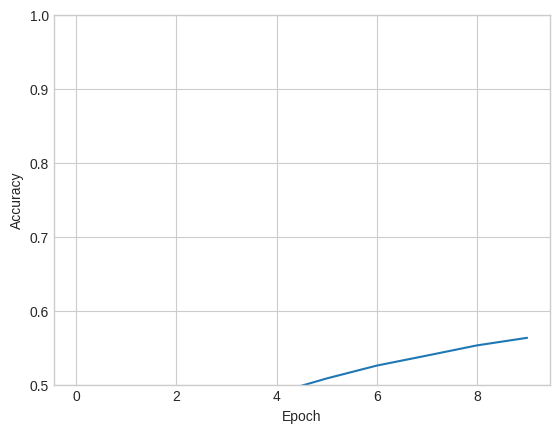

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='Upper right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)